# **Data_602 Final Project**
### By Mubashira Qari

# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

### Describing Dataset

The first dataset is the weekly summary of school learning modalities. It has 923K row and 9 columns.
The second dataset is the US county level covid-19 cases and deaths counts. It has 2249807 rows and 6 columns.
These datasets require detailed data cleaning before performing the data manipulation steps.


### Data Source Link

The datasets are acquired from the following sources,
•	HealthData.gov
•	NYTimes Covid-19 data – GitHub
•	US Zip code to County State to FIPS Look Up – data.world
•	States Names and Abbreviations - GitHub

https://healthdata.gov/National/School-Learning-Modalities/aitj-yx37/data

https://github.com/nytimes/covid-19-data

https://data.world/niccolley/us-zipcode-to-county-state

https://github.com/jasonong/List-of-US-States/blob/master/states.csv



### Justification for Dataset Selection

The reason for choosing these datasets is that I am interested in finding out the impact of covid-19 on the learning modalities for the students. 
My focus will be to investigate the state level trend for the hybrid, remote and in-person learning due to covid for the year 2021 and 2022.



# Data Exploration (EDA)
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



### **Importing Libraries**

#### The first step is to import libraries for data exploration, cleaning and manipulation.

In [83]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')




In [84]:
csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/Final_Project_Data_602/resources/school_learning_modalities.csv'
modality_df = pd.read_csv(csv_path, encoding="utf-8")
modality_df.head(5)

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code
0,100005,Albertville City,10/23/2022 0:00,In Person,6,5824.0,Albertville,AL,35950
1,100006,Marshall County,10/23/2022 0:00,In Person,15,5764.0,Guntersville,AL,35976
2,100007,Hoover City,10/23/2022 0:00,In Person,18,14061.0,Hoover,AL,35243
3,100008,Madison City,10/23/2022 0:00,In Person,11,11695.0,Madison,AL,35758
4,100011,Leeds City,10/23/2022 0:00,In Person,4,2076.0,Leeds,AL,35094


In [85]:
csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/Final_Project_Data_602/resources/zip-county_fips.csv'
zip_county_fips_df = pd.read_csv(csv_path, encoding="utf-8")
zip_county_fips_df.head(5)

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


In [86]:
csv_path = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv'
covid_2021_df = pd.read_csv(csv_path, encoding="utf-8")
covid_2021_df.head(5)

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0


In [87]:
csv_path = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv'
covid_2022_df = pd.read_csv(csv_path, encoding="utf-8")
covid_2022_df.head(5)

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0


In [88]:
csv_path = 'https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv'
states_df = pd.read_csv(csv_path, encoding="utf-8")
states_df.head(5)

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### **Exploratory Data Analysis (EDA)**

Now previewing the data by calling the dataframe using "info()" function and finding the number of cloumns and rows.

This function provides the total number of rows and columns as well as the datatype of each column. 

Also, we are able to see the count of non-null values, which will help us further investigate the missing, or unexpected values in our dataset.

In [89]:
modality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885591 entries, 0 to 885590
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   District NCES ID     885591 non-null  int64  
 1   District Name        885591 non-null  object 
 2   Week                 885591 non-null  object 
 3   Learning Modality    885591 non-null  object 
 4   Operational Schools  885591 non-null  int64  
 5   Student Count        884691 non-null  float64
 6   City                 885591 non-null  object 
 7   State                885591 non-null  object 
 8   ZIP Code             885591 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


###  The "shape" method provide the row and column count.

In [90]:
modality_df.shape

(885591, 9)

 
### The value_counts() funtion helps in finding the count of values that appear in a column. 

In [95]:
modality_df['Week'].value_counts()

3/13/2022 0:00     14653
4/17/2022 0:00     14649
3/6/2022 0:00      14649
2/27/2022 0:00     14648
3/20/2022 0:00     14648
                   ...  
10/16/2022 0:00    10845
10/23/2022 0:00    10843
8/21/2022 0:00     10599
8/14/2022 0:00     10524
8/7/2022 0:00      10002
Name: Week, Length: 65, dtype: int64

In [ ]:
modality_df['Week'].values.tolist()

### **Data Wrangling**
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables. 

8. Filter your data based on some condition. 

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups. 

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

### 1- Modify multiple column names.

In [98]:
modality_df.columns

Index(['District NCES ID', 'District Name', 'Week', 'Learning Modality',
       'Operational Schools', 'Student Count', 'City', 'State', 'ZIP Code'],
      dtype='object')

In [99]:
modality_df.head()

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code
0,100005,Albertville City,10/23/2022 0:00,In Person,6,5824.0,Albertville,AL,35950
1,100006,Marshall County,10/23/2022 0:00,In Person,15,5764.0,Guntersville,AL,35976
2,100007,Hoover City,10/23/2022 0:00,In Person,18,14061.0,Hoover,AL,35243
3,100008,Madison City,10/23/2022 0:00,In Person,11,11695.0,Madison,AL,35758
4,100011,Leeds City,10/23/2022 0:00,In Person,4,2076.0,Leeds,AL,35094


### Converting date column into Month and Year columns to prepare for machine learning.

In [100]:
modality_df["Week"]= pd.to_datetime(modality_df["Week"])

modality_df['year'] = modality_df['Week'].dt.year


In [101]:
modality_df['month'] = modality_df['Week'].dt.month

In [102]:
modality_df['year'].values.tolist()
modality_df['month'].value_counts()

10    113469
8     106106
9      98004
5      73151
7      73051
1      72985
3      58596
4      58589
2      58569
6      58466
12     57631
11     56974
Name: month, dtype: int64

In [103]:
modality_df

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code,year,month
0,100005,Albertville City,2022-10-23,In Person,6,5824.0,Albertville,AL,35950,2022,10
1,100006,Marshall County,2022-10-23,In Person,15,5764.0,Guntersville,AL,35976,2022,10
2,100007,Hoover City,2022-10-23,In Person,18,14061.0,Hoover,AL,35243,2022,10
3,100008,Madison City,2022-10-23,In Person,11,11695.0,Madison,AL,35758,2022,10
4,100011,Leeds City,2022-10-23,In Person,4,2076.0,Leeds,AL,35094,2022,10
...,...,...,...,...,...,...,...,...,...,...,...
885586,5900187,Hannahville Indian School,2021-08-01,In Person,1,163.0,Wilson,BI,49896,2021,8
885587,5900190,Tiospaye Topa School,2021-08-01,In Person,1,157.0,LaPlant,BI,57652,2021,8
885588,5900193,Seba Dalkai Boarding School,2021-08-01,Hybrid,1,65.0,Winslow,BI,86047,2021,8
885589,5900197,Noli School,2021-08-01,In Person,1,123.0,San Jacinto,BI,92581,2021,8


### Remove columns not required in the analysis and machine learning model

In [104]:
modality_df = modality_df.drop(['District NCES ID', 'District Name', 'Week', 'City'], axis=1)
modality_df

,Learning Modality,Operational Schools,Student Count,State,ZIP Code,year,month
0,In Person,6,5824.0,AL,35950,2022,10
1,In Person,15,5764.0,AL,35976,2022,10
2,In Person,18,14061.0,AL,35243,2022,10
3,In Person,11,11695.0,AL,35758,2022,10
4,In Person,4,2076.0,AL,35094,2022,10
...,...,...,...,...,...,...,...
885586,In Person,1,163.0,BI,49896,2021,8
885587,In Person,1,157.0,BI,57652,2021,8
885588,Hybrid,1,65.0,BI,86047,2021,8
885589,In Person,1,123.0,BI,92581,2021,8


In [105]:
modality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885591 entries, 0 to 885590
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Learning Modality    885591 non-null  object 
 1   Operational Schools  885591 non-null  int64  
 2   Student Count        884691 non-null  float64
 3   State                885591 non-null  object 
 4   ZIP Code             885591 non-null  int64  
 5   year                 885591 non-null  int64  
 6   month                885591 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 47.3+ MB


### Convert the "Student Count" datatype to Integer and replace NaN values with 0

In [106]:
modality_df['Student Count'] = modality_df['Student Count'].fillna(0).astype(int)
print(modality_df.dtypes)

Learning Modality      object
Operational Schools     int64
Student Count           int64
State                  object
ZIP Code                int64
year                    int64
month                   int64
dtype: object


In [107]:
missing_values_table(modality_df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Change all column headers to lowercase and removing white spaces

In [108]:
# rename Pandas columns to lower case
modality_df.columns= modality_df.columns.str.strip().str.lower()
modality_df.columns

Index(['learning modality', 'operational schools', 'student count', 'state',
       'zip code', 'year', 'month'],
      dtype='object')

### Remove spaces in columns name

In [109]:
modality_df.columns = modality_df.columns.str.replace(' ','_')
   
# After renaming the columns
modality_df.columns


Index(['learning_modality', 'operational_schools', 'student_count', 'state',
       'zip_code', 'year', 'month'],
      dtype='object')

### To apply title to the column values

In [110]:
# converting and overwriting values in column
modality_df['learning_modality']= modality_df['learning_modality'].str.upper().str.title()
modality_df.head()

,learning_modality,operational_schools,student_count,state,zip_code,year,month
0,In Person,6,5824,AL,35950,2022,10
1,In Person,15,5764,AL,35976,2022,10
2,In Person,18,14061,AL,35243,2022,10
3,In Person,11,11695,AL,35758,2022,10
4,In Person,4,2076,AL,35094,2022,10


### Creating a function which will remove extra leading
### and trailing whitespace from the data.
### pass dataframe as a parameter here

In [111]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(modality_df)
modality_df.head()

,learning_modality,operational_schools,student_count,state,zip_code,year,month
0,In Person,6,5824,AL,35950,2022,10
1,In Person,15,5764,AL,35976,2022,10
2,In Person,18,14061,AL,35243,2022,10
3,In Person,11,11695,AL,35758,2022,10
4,In Person,4,2076,AL,35094,2022,10


### Resetting the index of the dataframe

In [112]:
# Reseting index
modality_df = modality_df.reset_index(drop=True)
modality_df

,learning_modality,operational_schools,student_count,state,zip_code,year,month
0,In Person,6,5824,AL,35950,2022,10
1,In Person,15,5764,AL,35976,2022,10
2,In Person,18,14061,AL,35243,2022,10
3,In Person,11,11695,AL,35758,2022,10
4,In Person,4,2076,AL,35094,2022,10
...,...,...,...,...,...,...,...
885586,In Person,1,163,BI,49896,2021,8
885587,In Person,1,157,BI,57652,2021,8
885588,Hybrid,1,65,BI,86047,2021,8
885589,In Person,1,123,BI,92581,2021,8


### **CLeaning Zip_County_Fips_Df for merging into the datafarme**

In [113]:
zip_county_fips_df.head(5)

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


### Rename Pandas columns to lower case and stripping white spaces

In [114]:
zip_county_fips_df.columns= zip_county_fips_df.columns.str.strip().str.lower()
zip_county_fips_df.columns

Index(['zip', 'countyname', 'state', 'stcountyfp', 'classfp'], dtype='object')

In [115]:
zip_county_fips_df.dtypes

zip            int64
countyname    object
state         object
stcountyfp     int64
classfp       object
dtype: object

In [116]:
zip_county_fips_df=zip_county_fips_df.rename({'stcountyfp':'fips'}, axis=1)

### Dropping 'classfp' column

In [117]:
zip_county_fips_df = zip_county_fips_df.drop(['classfp', 'state'], axis=1)
zip_county_fips_df

,zip,countyname,fips
0,36003,Autauga County,1001
1,36006,Autauga County,1001
2,36008,Autauga County,1001
3,36022,Autauga County,1001
4,36051,Autauga County,1001
...,...,...,...
46850,820,St. Croix Island,78010
46851,840,St. Croix Island,78010
46852,850,St. Croix Island,78010
46853,830,St. John Island,78020


### Removing the "County" and "Island" string from the column

In [118]:
# zip_county_fips_df['countyname'] = zip_county_fips_df['countyname'].str.rstrip('County')

In [119]:
# zip_county_fips_df['countyname'] = zip_county_fips_df['countyname'].str.rstrip('Island')

In [120]:
fips_df = zip_county_fips_df.drop(['zip'], axis=1)
fips_df

,countyname,fips
0,Autauga County,1001
1,Autauga County,1001
2,Autauga County,1001
3,Autauga County,1001
4,Autauga County,1001
...,...,...
46850,St. Croix Island,78010
46851,St. Croix Island,78010
46852,St. Croix Island,78010
46853,St. John Island,78020


In [121]:
#drop duplicates from DataFrame
fips_df = fips_df.drop_duplicates()
fips_df

,countyname,fips
0,Autauga County,1001
11,Baldwin County,1003
34,Barbour County,1005
42,Bibb County,1007
54,Blount County,1009
...,...,...
46848,Yabucoa Municipio,72151
46849,Yauco Municipio,72153
46850,St. Croix Island,78010
46853,St. John Island,78020


In [122]:
fips_df = fips_df.reset_index(drop=True)
fips_df

,countyname,fips
0,Autauga County,1001
1,Baldwin County,1003
2,Barbour County,1005
3,Bibb County,1007
4,Blount County,1009
...,...,...
3213,Yabucoa Municipio,72151
3214,Yauco Municipio,72153
3215,St. Croix Island,78010
3216,St. John Island,78020


In [123]:
# zip_county_fips_df.info()
zip_county_fips_df.head()


,zip,countyname,fips
0,36003,Autauga County,1001
1,36006,Autauga County,1001
2,36008,Autauga County,1001
3,36022,Autauga County,1001
4,36051,Autauga County,1001


In [124]:
# zip_county_fips_df['countyname'].values.tolist()

### Remove special characters from string column

In [125]:
### Remove special characters from string column
# zip_county_fips_df['countyname'] = zip_county_fips_df['countyname'].str.replace('\W', '', regex=True)
# zip_county_fips_df['countyname'].values.tolist()

### Saving the file to upload on PostgreSql

In [126]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#fips_df.to_csv("posgres_zip_county_fips_df.csv", encoding="utf-8", index=False)

### **Merge the zip_county_fips_df and modality_df for adding the fips_code in the dataframe**

In [127]:
#merge DataFrames
modality_fips_df = pd.merge(zip_county_fips_df, modality_df, left_on='zip', right_on='zip_code')
modality_fips_df.head()

,zip,countyname,fips,learning_modality,operational_schools,student_count,state,zip_code,year,month
0,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
1,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
2,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
3,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
4,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,9


In [128]:
#merge DataFrames
modality_fips_df = pd.merge(states_df, modality_fips_df, left_on='Abbreviation', right_on='state')
modality_fips_df.head()

,State,Abbreviation,zip,countyname,fips,learning_modality,operational_schools,student_count,state,zip_code,year,month
0,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
1,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
2,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
3,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,10
4,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,AL,36067,2022,9


In [129]:
#drop one column by index

modality_fips_df.drop('state', axis=1, inplace=True)
modality_fips_df.head()

,State,Abbreviation,zip,countyname,fips,learning_modality,operational_schools,student_count,zip_code,year,month
0,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,10
1,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,10
2,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,10
3,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,10
4,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,9


In [130]:
modality_fips_df["countyname"].value_counts()

Maricopa County      14425
Washington County    12894
Franklin County      11049
Wayne County         10526
Jefferson County     10388
                     ...  
Hood River County       12
Ziebach County          12
McMullen County         12
Morehouse Parish        12
Kenedy County            9
Name: countyname, Length: 1846, dtype: int64

### Dropping the duplicate rows based on all columns

In [131]:
modality_fips_df = modality_fips_df.drop_duplicates()
modality_fips_df

,State,Abbreviation,zip,countyname,fips,learning_modality,operational_schools,student_count,zip_code,year,month
0,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,10
4,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,9
8,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,8
12,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,7
17,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,6
...,...,...,...,...,...,...,...,...,...,...,...
1206613,Wyoming,WY,82701,Weston County,56045,In Person,4,810,82701,2021,9
1206617,Wyoming,WY,82701,Weston County,56045,In Person,4,810,82701,2021,8
1206621,Wyoming,WY,82730,Weston County,56045,In Person,3,235,82730,2022,10
1206625,Wyoming,WY,82730,Weston County,56045,In Person,3,235,82730,2022,9


### Removing white spaces from entire dataframe

In [132]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(modality_fips_df)
modality_fips_df.head()

,State,Abbreviation,zip,countyname,fips,learning_modality,operational_schools,student_count,zip_code,year,month
0,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,10
4,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,9
8,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,8
12,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,7
17,Alabama,AL,36067,Autauga County,1001,In Person,15,9120,36067,2022,6


### Dropping duplicate value columns

# Preparing for Postgresql import

In [133]:
modality_fips_df = modality_fips_df.drop(['zip_code', 'month', 'operational_schools'], axis=1)
modality_fips_df

,State,Abbreviation,zip,countyname,fips,learning_modality,student_count,year
0,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
4,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
8,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
12,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
17,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
...,...,...,...,...,...,...,...,...
1206613,Wyoming,WY,82701,Weston County,56045,In Person,810,2021
1206617,Wyoming,WY,82701,Weston County,56045,In Person,810,2021
1206621,Wyoming,WY,82730,Weston County,56045,In Person,235,2022
1206625,Wyoming,WY,82730,Weston County,56045,In Person,235,2022


In [134]:
modality_fips_df= modality_fips_df.rename(columns=str.lower)
modality_fips_df

,state,abbreviation,zip,countyname,fips,learning_modality,student_count,year
0,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
4,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
8,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
12,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
17,Alabama,AL,36067,Autauga County,1001,In Person,9120,2022
...,...,...,...,...,...,...,...,...
1206613,Wyoming,WY,82701,Weston County,56045,In Person,810,2021
1206617,Wyoming,WY,82701,Weston County,56045,In Person,810,2021
1206621,Wyoming,WY,82730,Weston County,56045,In Person,235,2022
1206625,Wyoming,WY,82730,Weston County,56045,In Person,235,2022


### Now Groupby county and average the student count

In [135]:
# Groupby one column and return the mean of only particular column in the group.
new_modality_df = modality_fips_df.groupby(['countyname', 'fips', 'learning_modality', 'state', 'abbreviation', 'year'], as_index=False).agg(student_count= ('student_count','sum'))
new_modality_df

,countyname,fips,learning_modality,state,abbreviation,year,student_count
0,Abbeville County,45001,Hybrid,South Carolina,SC,2022,11890
1,Abbeville County,45001,In Person,South Carolina,SC,2021,95710
2,Abbeville County,45001,In Person,South Carolina,SC,2022,180362
3,Acadia Parish,22001,In Person,Louisiana,LA,2021,77220
4,Acadia Parish,22001,In Person,Louisiana,LA,2022,154440
...,...,...,...,...,...,...,...
8496,Zapata County,48505,In Person,Texas,TX,2021,17745
8497,Zapata County,48505,In Person,Texas,TX,2022,35490
8498,Zavala County,48507,In Person,Texas,TX,2021,12095
8499,Zavala County,48507,In Person,Texas,TX,2022,24190


In [136]:
new_modality_df['student_count'] = new_modality_df['student_count'].astype(int)
new_modality_df.dtypes
new_modality_df

,countyname,fips,learning_modality,state,abbreviation,year,student_count
0,Abbeville County,45001,Hybrid,South Carolina,SC,2022,11890
1,Abbeville County,45001,In Person,South Carolina,SC,2021,95710
2,Abbeville County,45001,In Person,South Carolina,SC,2022,180362
3,Acadia Parish,22001,In Person,Louisiana,LA,2021,77220
4,Acadia Parish,22001,In Person,Louisiana,LA,2022,154440
...,...,...,...,...,...,...,...
8496,Zapata County,48505,In Person,Texas,TX,2021,17745
8497,Zapata County,48505,In Person,Texas,TX,2022,35490
8498,Zavala County,48507,In Person,Texas,TX,2021,12095
8499,Zavala County,48507,In Person,Texas,TX,2022,24190


In [137]:
new_modality_df = new_modality_df.drop_duplicates()
new_modality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8501 entries, 0 to 8500
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   countyname         8501 non-null   object
 1   fips               8501 non-null   int64 
 2   learning_modality  8501 non-null   object
 3   state              8501 non-null   object
 4   abbreviation       8501 non-null   object
 5   year               8501 non-null   int64 
 6   student_count      8501 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 531.3+ KB


In [138]:
new_df = new_modality_df[new_modality_df['student_count'] > 1000]
new_df

,countyname,fips,learning_modality,state,abbreviation,year,student_count
0,Abbeville County,45001,Hybrid,South Carolina,SC,2022,11890
1,Abbeville County,45001,In Person,South Carolina,SC,2021,95710
2,Abbeville County,45001,In Person,South Carolina,SC,2022,180362
3,Acadia Parish,22001,In Person,Louisiana,LA,2021,77220
4,Acadia Parish,22001,In Person,Louisiana,LA,2022,154440
...,...,...,...,...,...,...,...
8496,Zapata County,48505,In Person,Texas,TX,2021,17745
8497,Zapata County,48505,In Person,Texas,TX,2022,35490
8498,Zavala County,48507,In Person,Texas,TX,2021,12095
8499,Zavala County,48507,In Person,Texas,TX,2022,24190


In [139]:
# Reseting index
new_modality_df = new_modality_df.reset_index(drop=True)
new_modality_df

,countyname,fips,learning_modality,state,abbreviation,year,student_count
0,Abbeville County,45001,Hybrid,South Carolina,SC,2022,11890
1,Abbeville County,45001,In Person,South Carolina,SC,2021,95710
2,Abbeville County,45001,In Person,South Carolina,SC,2022,180362
3,Acadia Parish,22001,In Person,Louisiana,LA,2021,77220
4,Acadia Parish,22001,In Person,Louisiana,LA,2022,154440
...,...,...,...,...,...,...,...
8496,Zapata County,48505,In Person,Texas,TX,2021,17745
8497,Zapata County,48505,In Person,Texas,TX,2022,35490
8498,Zavala County,48507,In Person,Texas,TX,2021,12095
8499,Zavala County,48507,In Person,Texas,TX,2022,24190


In [ ]:
new_modality_df["student_count"].values.tolist()

In [141]:
new_modality_df["student_count"] = new_modality_df["student_count"].fillna(0)
new_modality_df = new_modality_df.dropna()
new_modality_df['student_count'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
8496    True
8497    True
8498    True
8499    True
8500    True
Name: student_count, Length: 8501, dtype: bool

In [142]:
new_modality_df.describe()

,fips,year,student_count
count,8501.000000,8501.000000,8.501000e+03
mean,30365.776497,2021.504176,1.093112e+05
std,14907.256607,0.500012,3.668982e+05
min,1001.000000,2021.000000,0.000000e+00
25%,19007.000000,2021.000000,6.492000e+03
50%,29187.000000,2022.000000,2.498000e+04
75%,42131.000000,2022.000000,7.924800e+04
max,56045.000000,2022.000000,1.374667e+07


In [143]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
# new_modality_df.to_csv("posgres_modality_df.csv", encoding="utf-8", index=False)

### **Now Concatinating the Covid_2021 and Covid_2022 dataframes**

In [144]:
covid_2021_df.head()

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0


In [145]:
covid_2022_df.head()

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0


### Concatenating covid_2021_df and covid_2022_df along rows (Vertical)

In [146]:
covid_df = pd.concat([covid_2021_df, covid_2022_df], axis=0)
covid_df

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0
...,...,...,...,...,...,...
1067682,2022-11-24,Sweetwater,Wyoming,56037.0,12263,131.0
1067683,2022-11-24,Teton,Wyoming,56039.0,11888,16.0
1067684,2022-11-24,Uinta,Wyoming,56041.0,6239,43.0
1067685,2022-11-24,Washakie,Wyoming,56043.0,2674,47.0


### **Data Cleaning for Covid_df dataframe**

In [147]:
covid_df = covid_df.drop_duplicates()
covid_df

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0
...,...,...,...,...,...,...
1067682,2022-11-24,Sweetwater,Wyoming,56037.0,12263,131.0
1067683,2022-11-24,Teton,Wyoming,56039.0,11888,16.0
1067684,2022-11-24,Uinta,Wyoming,56041.0,6239,43.0
1067685,2022-11-24,Washakie,Wyoming,56043.0,2674,47.0


### Converting into correct date format and then converting date column into Month and Year columns to prepare for machine learning.

In [148]:
covid_df["date"]= pd.to_datetime(covid_df["date"])

covid_df['month'] = covid_df['date'].dt.month

In [149]:
covid_df['year'] = covid_df['date'].dt.year
covid_df.head()

,date,county,state,fips,cases,deaths,month,year
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0,1,2021
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0,1,2021
2,2021-01-01,Barbour,Alabama,1005.0,1517,33.0,1,2021
3,2021-01-01,Bibb,Alabama,1007.0,1854,46.0,1,2021
4,2021-01-01,Blount,Alabama,1009.0,4693,63.0,1,2021


### Convert the "Student Count" datatype to Integer and replace NaN values with 0

In [150]:
covid_df['fips'] = covid_df['fips'].fillna(0).astype(int)
covid_df['deaths'] = covid_df['deaths'].fillna(0).astype(int)
print(covid_df.dtypes)

date      datetime64[ns]
county            object
state             object
fips               int64
cases              int64
deaths             int64
month              int64
year               int64
dtype: object


In [151]:
covid_df.head()

,date,county,state,fips,cases,deaths,month,year
0,2021-01-01,Autauga,Alabama,1001,4239,50,1,2021
1,2021-01-01,Baldwin,Alabama,1003,13823,169,1,2021
2,2021-01-01,Barbour,Alabama,1005,1517,33,1,2021
3,2021-01-01,Bibb,Alabama,1007,1854,46,1,2021
4,2021-01-01,Blount,Alabama,1009,4693,63,1,2021


### Dropping the unwanted Columns

In [152]:
covid_df = covid_df.drop(['date', 'month'], axis=1)
covid_df.head()

,county,state,fips,cases,deaths,year
0,Autauga,Alabama,1001,4239,50,2021
1,Baldwin,Alabama,1003,13823,169,2021
2,Barbour,Alabama,1005,1517,33,2021
3,Bibb,Alabama,1007,1854,46,2021
4,Blount,Alabama,1009,4693,63,2021


### Resetting the index of the dataframe

In [153]:
# Reseting index
covid_df = covid_df.reset_index(drop=True)
covid_df

,county,state,fips,cases,deaths,year
0,Autauga,Alabama,1001,4239,50,2021
1,Baldwin,Alabama,1003,13823,169,2021
2,Barbour,Alabama,1005,1517,33,2021
3,Bibb,Alabama,1007,1854,46,2021
4,Blount,Alabama,1009,4693,63,2021
...,...,...,...,...,...,...
2253055,Sweetwater,Wyoming,56037,12263,131,2022
2253056,Teton,Wyoming,56039,11888,16,2022
2253057,Uinta,Wyoming,56041,6239,43,2022
2253058,Washakie,Wyoming,56043,2674,47,2022


### GroupBy County column and sum cases and deaths

In [154]:
# Groupby one column and return the sum of only particular columns in the group.
new_covid_df = covid_df.groupby(['county', 'fips', 'state', 'year'], as_index=False).agg(cases_count= ('cases','sum'), deaths_count= ('deaths','sum'))
new_covid_df

,county,fips,state,year,cases_count,deaths_count
0,Abbeville,45001,South Carolina,2021,1037711,15004
1,Abbeville,45001,South Carolina,2022,2205794,22493
2,Acadia,22001,Louisiana,2021,2880225,76394
3,Acadia,22001,Louisiana,2022,5400839,95612
4,Accomack,51001,Virginia,2021,1147639,18727
...,...,...,...,...,...,...
6526,Zapata,48505,Texas,2022,1236983,17598
6527,Zavala,48507,Texas,2021,739357,16044
6528,Zavala,48507,Texas,2022,1343915,21955
6529,Ziebach,46137,South Dakota,2021,133985,3340


### Convert the value of 'county' and 'state' columns to lowercase

In [155]:
# new_covid_df['county'] = new_covid_df['county'].map(str.lower)
# new_covid_df['state'] = new_covid_df['state'].map(str.lower)

In [156]:
new_covid_df = new_covid_df.drop_duplicates()
new_covid_df

,county,fips,state,year,cases_count,deaths_count
0,Abbeville,45001,South Carolina,2021,1037711,15004
1,Abbeville,45001,South Carolina,2022,2205794,22493
2,Acadia,22001,Louisiana,2021,2880225,76394
3,Acadia,22001,Louisiana,2022,5400839,95612
4,Accomack,51001,Virginia,2021,1147639,18727
...,...,...,...,...,...,...
6526,Zapata,48505,Texas,2022,1236983,17598
6527,Zavala,48507,Texas,2021,739357,16044
6528,Zavala,48507,Texas,2022,1343915,21955
6529,Ziebach,46137,South Dakota,2021,133985,3340


In [157]:
#merge DataFrames
covid_fips_df = pd.merge(fips_df, new_covid_df, left_on='fips', right_on='fips')
covid_fips_df

,countyname,fips,county,state,year,cases_count,deaths_count
0,Autauga County,1001,Autauga,Alabama,2021,2871893,41785
1,Autauga County,1001,Autauga,Alabama,2022,5394518,69037
2,Baldwin County,1003,Baldwin,Alabama,2021,9751057,136369
3,Baldwin County,1003,Baldwin,Alabama,2022,19212651,222009
4,Barbour County,1005,Barbour,Alabama,2021,983791,22337
...,...,...,...,...,...,...,...
6409,St. Croix Island,78010,St. Croix,Virgin Islands,2022,3141630,15892
6410,St. John Island,78020,St. John,Virgin Islands,2021,96916,646
6411,St. John Island,78020,St. John,Virgin Islands,2022,287228,1640
6412,St. Thomas Island,78030,St. Thomas,Virgin Islands,2021,878072,9708


In [158]:
covid_fips_df = covid_fips_df.drop(['county'], axis=1)
covid_fips_df

,countyname,fips,state,year,cases_count,deaths_count
0,Autauga County,1001,Alabama,2021,2871893,41785
1,Autauga County,1001,Alabama,2022,5394518,69037
2,Baldwin County,1003,Alabama,2021,9751057,136369
3,Baldwin County,1003,Alabama,2022,19212651,222009
4,Barbour County,1005,Alabama,2021,983791,22337
...,...,...,...,...,...,...
6409,St. Croix Island,78010,Virgin Islands,2022,3141630,15892
6410,St. John Island,78020,Virgin Islands,2021,96916,646
6411,St. John Island,78020,Virgin Islands,2022,287228,1640
6412,St. Thomas Island,78030,Virgin Islands,2021,878072,9708


In [159]:
covid_fips_df.describe()

,fips,year,cases_count,deaths_count
count,6414.000000,6414.000000,6.414000e+03,6.414000e+03
mean,31514.626442,2021.500000,6.216018e+06,8.109164e+04
std,16303.972965,0.500039,2.289098e+07,2.780176e+05
min,1001.000000,2021.000000,3.280000e+02,0.000000e+00
25%,19045.500000,2021.000000,6.159142e+05,9.381250e+03
50%,30031.000000,2021.500000,1.548958e+06,2.401300e+04
75%,46120.500000,2022.000000,4.099170e+06,5.904025e+04
max,78030.000000,2022.000000,9.994525e+08,1.049530e+07


Scatter Plot:  


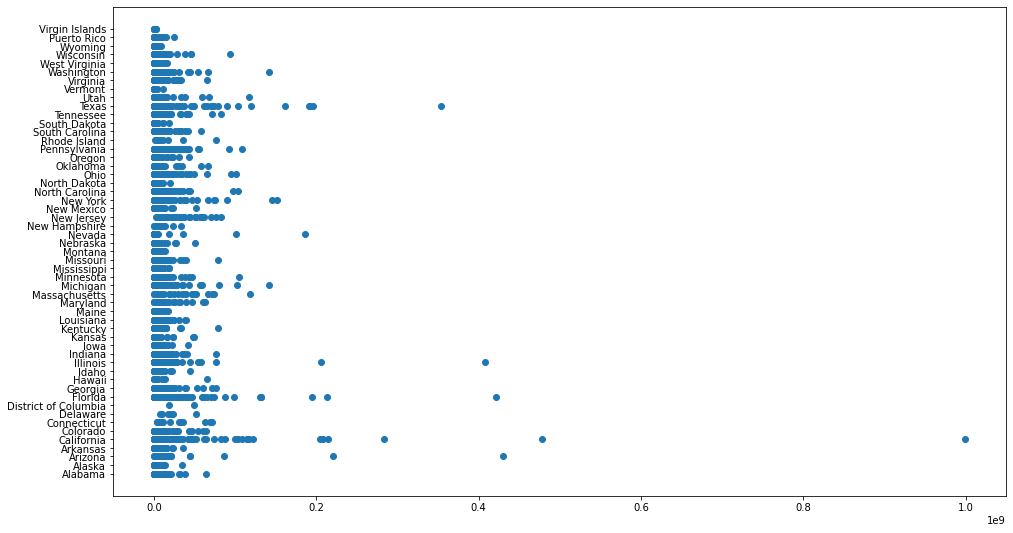

In [160]:
plt.rcParams["figure.figsize"] = [16,9]
# plotting a scatter plot
print("Scatter Plot:  ")
plt.scatter(covid_fips_df["cases_count"], covid_fips_df["state"])
plt.show()

### Remove special characters from string column

In [161]:
### Remove special characters from string column
# new_covid_df['county'] = new_covid_df['county'].str.replace('\W', '', regex=True)
# new_covid_df['state'] = new_covid_df['state'].str.replace('\W', '', regex=True)
# new_covid_df['county'].values.tolist()

### Exporting the Covid_df for PostgreSql

In [162]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#covid_fips_df.to_csv("posgres_covid_df.csv", encoding="utf-8", index=False)

## **Conclusions**
After exploring your dataset, provide a short summary of what you noticed from this dataset. What would you explore further with more time?